# **Function Transformer**

* if i have non normal distribution data and i want it convert to normal distribution data then we use function transformation

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('function_transformer.csv')
df

,id,income,age,purchases
0,1,23463.404499,35.870471,4
1,2,150506.071546,32.009926,2
2,3,65837.284677,35.917608,5
3,4,45647.127689,15.124311,0
4,5,8481.243523,32.803281,6
...,...,...,...,...
95,96,34040.736576,26.841897,2
96,97,36983.941939,34.228983,3
97,98,27890.709695,38.411520,2
98,99,1287.388700,37.766908,2


In [5]:
df.isnull().sum()

id           0
income       0
age          0
purchases    0
dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_18360\850686707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income'])


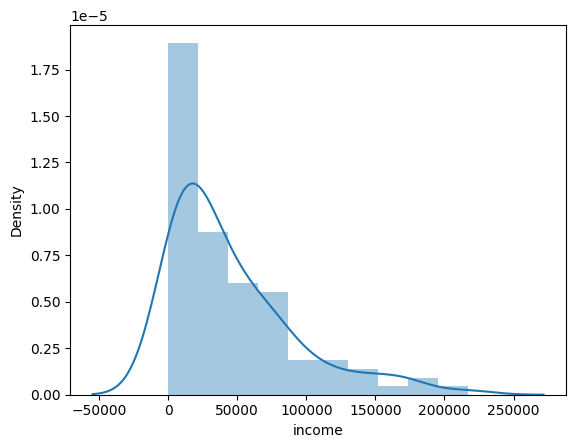

In [8]:
sns.distplot(df['income'])

* we can see on this graph right tail is very longer so here is skewed so its non normal distrubution. 

* now first of all we remove outlier.

In [12]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
Q1,Q3

(np.float64(10734.90854252135), np.float64(65504.663067733396))

In [14]:
IQR = Q3 - Q1
IQR

np.float64(54769.75452521205)

In [16]:
min_range = Q1 - (1.5 * IQR)
max_range = Q3 + (1.5 * IQR)
min_range, max_range

(np.float64(-71419.72324529671), np.float64(147659.29485555147))

In [17]:
new_df = df[df['income'] <= max_range]
new_df

,id,income,age,purchases
0,1,23463.404499,35.870471,4
2,3,65837.284677,35.917608,5
3,4,45647.127689,15.124311,0
4,5,8481.243523,32.803281,6
5,6,8479.814596,38.571126,2
...,...,...,...,...
95,96,34040.736576,26.841897,2
96,97,36983.941939,34.228983,3
97,98,27890.709695,38.411520,2
98,99,1287.388700,37.766908,2


C:\Users\Asus\AppData\Local\Temp\ipykernel_18360\506192808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df["income"])


<Axes: xlabel='income', ylabel='Density'>

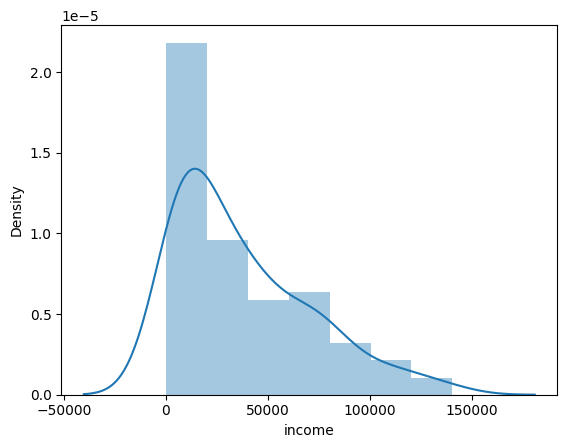

In [19]:
sns.distplot(new_df["income"])

* now we  are doing convert normal distribution use function distribution.

In [20]:
from sklearn.preprocessing import FunctionTransformer

In [21]:
ft = FunctionTransformer()

In [30]:
ft = FunctionTransformer(func = np.log1p)
ft.fit_transform(new_df[['income']])

,income
0,10.063240
2,11.094957
3,10.728718
4,9.045730
5,9.045562
...,...
95,10.435343
96,10.518266
97,10.236085
98,7.161148


In [32]:
new_df["income_ft"] = ft.fit_transform(new_df[['income']])
new_df

C:\Users\Asus\AppData\Local\Temp\ipykernel_18360\452395663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["income_ft"] = ft.fit_transform(new_df[['income']])


,id,income,age,purchases,income_ft
0,1,23463.404499,35.870471,4,10.063240
2,3,65837.284677,35.917608,5,11.094957
3,4,45647.127689,15.124311,0,10.728718
4,5,8481.243523,32.803281,6,9.045730
5,6,8479.814596,38.571126,2,9.045562
...,...,...,...,...,...
95,96,34040.736576,26.841897,2,10.435343
96,97,36983.941939,34.228983,3,10.518266
97,98,27890.709695,38.411520,2,10.236085
98,99,1287.388700,37.766908,2,7.161148


C:\Users\Asus\AppData\Local\Temp\ipykernel_18360\642888420.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['income'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_18360\642888420.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['income_ft'])


Text(0.5, 1.0, 'after')

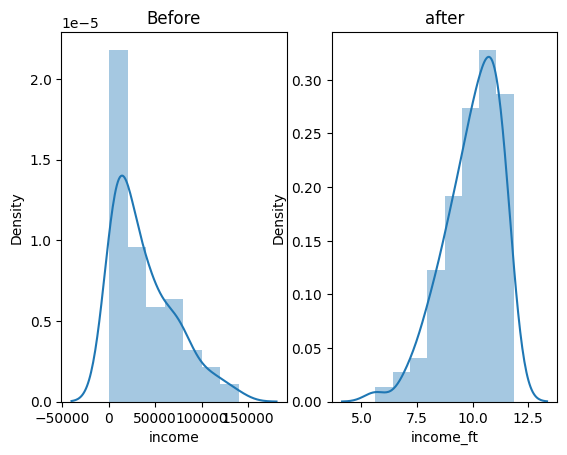

In [33]:
plt.subplot(1,2,1)
sns.distplot(new_df['income'])
plt.title('Before')

plt.subplot(1,2,2)
sns.distplot(new_df['income_ft'])
plt.title('after')

* here we can see after graph made normal distrubution